# Исследование объявлений о продаже квартир

Для исследования даны данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Задача — установить параметры, которые помогут установить рыночную стоимость объекта. Данные будут использоваться для создания автоматизированной системы. 

Описание данных:
- airports_nearest — расстояние до ближайшего аэропорта в метрах (м)
- balcony — число балконов
- ceiling_height — высота потолков (м)
- cityCenters_nearest — расстояние до центра города (м)
- days_exposition — сколько дней было размещено объявление (от публикации до снятия)
- first_day_exposition — дата публикации
- floor — этаж
- floors_total — всего этажей в доме
- is_apartment — апартаменты (булев тип)
- kitchen_area — площадь кухни в квадратных метрах (м²)
- last_price — цена на момент снятия с публикации
- living_area — жилая площадь в квадратных метрах (м²)
- locality_name — название населённого пункта
- open_plan — свободная планировка (булев тип)
- parks_around3000 — число парков в радиусе 3 км
- parks_nearest — расстояние до ближайшего парка (м)
- ponds_around3000 — число водоёмов в радиусе 3 км
- ponds_nearest — расстояние до ближайшего водоёма (м)
- rooms — число комнат
- studio — квартира-студия (булев тип)
- total_area — общая площадь квартиры в квадратных метрах (м²)
- total_images — число фотографий квартиры в объявлении

Исследование будет состоять из нескольких этапов:
- предобработка данных (заполнение пропусков и выявление аномалий)
- просчет и добавление в таблицу новых параментов
- проведение исследовательского анализа данных
- анализ оценка полученных данных, выводы

Основные задачи исследования:
1. Изучить различные параметры объектов (общая площадь, жилая площадь, площадь кухни, цена объекта и т.д.) и выявить закономерности
2. Изучить, как быстро продавались квартиры, узнать сколько времени обычно занимает продажа. 
3. Какие факторы больше всего влияют на общую (полную) стоимость объекта?
4. Посчитать среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений и выделить населённые пункты с самой высокой и низкой стоимостью квадратного метра. 
5. Выяснить, как стоимость объектов зависит от расстояния до центра города.


### Изучение данных

In [1]:
# импортируем необходимые библиотеки и модули
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [5]:
# прочитаем csv-файл
data = pd.read_csv('/datasets/real_estate_data.csv', sep = '\t')
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


Датафрейм приобрел правильный вид, и для полноты картины изучим информацию о данных.

In [6]:
#изучим информацию о датафрейме
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

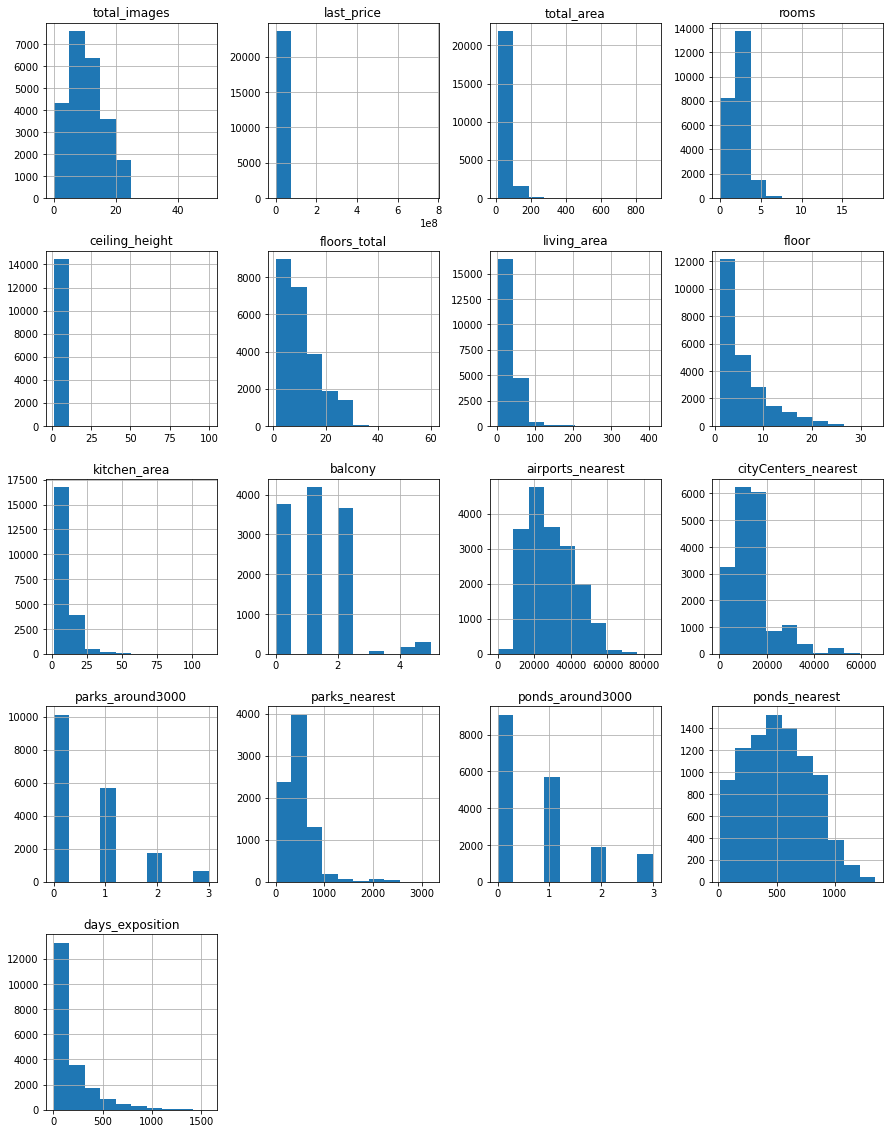

In [7]:
# построим общую гистограмму для всех параметров
data.hist(figsize=(15, 20));

**Вывод**

Теперь у нас есть первоначальное представление о датафрейме и вся информация о типе данных:
- first_day_exposition должно быть типа datatime
- не везде совпадает количество записей, а значит есть пропуски: ceiling_height, living_area, is_apartment, kitchen_area, balcony, airports_nearest, cityCenters_nearest, parks_around3000, parks_nearest, ponds_around3000, days_exposition   
- is_apartment - неверный тип данных
- days_exposition - неверный тип данных
- balcony - неверный тип данных
- floors_total - неверный тип данных
- ponds_around3000, parks_around3000 - неверный тип данных

### Предобработка данных

#### Изучим данные о пропусках.

In [8]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

Как мы видим, большинство столбцов содержат пропуски. Я думаю, что в таких столбцах, как ceiling_height или living_area, люди просто не заполняли их. А, например, balcony - пропуск означает, что балкона нет, тоже самое и про стобцы, где указана удаленность от чего либо (parks_nearest, ponds_nearest) скорее всего их просто рядом нет.

In [9]:
# check
# пропущенные значения бары

def pass_value_barh(df):
    try:
        (
            (df.isna().mean()*100)
            .to_frame()
            .rename(columns = {0:'space'})
            .query('space > 0')
            .sort_values(by = 'space', ascending = True)
            .plot(kind = 'barh', figsize = (19,6), rot = -5, legend = False, fontsize = 16)
            .set_title('Пример' + "\n", fontsize = 22, color = 'SteelBlue')    
        );    
    except:
        print('пропусков не осталось :) ')

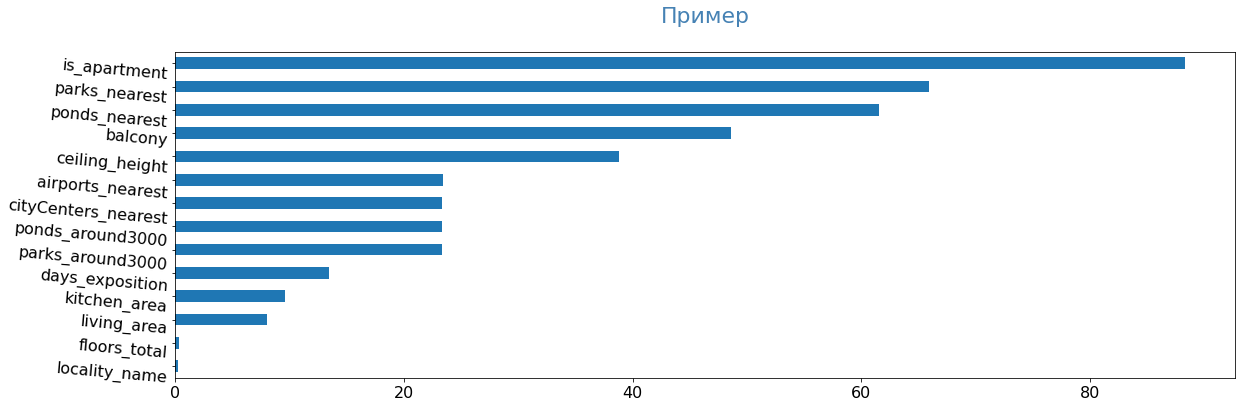

In [10]:
pass_value_barh(data)

In [11]:
# проверим есть ли явные дубликаты объявлений
data.duplicated().sum()

0

Явных дубликатов нет, двигаемся дальше.

#### Изменение типа данных и заполнение пропусков

In [12]:
#избавимся от пропусков, где необходимо, и изменим тип данных в столбцах, что я перечислила
#исправим столбец balcony на числовой и заменим пропуски на 0
data['balcony'] = data['balcony'].fillna(value='0')
data['balcony'] = data['balcony'].astype('int')

#исправим столбец is_apartment
data['is_apartment'] = data['is_apartment'].fillna(False)

#исправим столбец first_day_exposition, оставим только дату, так как время не указано
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%d')

#изменим цену на тип int
data['last_price'] = data['last_price'].astype('int')

# исправим тип данных и уберем пропуски в ponds_around3000, parks_around3000
data['ponds_around3000'] = data['ponds_around3000'].fillna(value='0').astype('int')
data['parks_around3000'] = data['parks_around3000'].fillna(value='0').astype('int')

# удаляем строки, где отсутствует локация и этажность, так как мало данных
data.dropna(subset=['locality_name'], inplace=True)
data.dropna(subset=['floors_total'], inplace=True)

# приводим количество этажей к числовому типу
data['floors_total'] = data['floors_total'].astype(int)


In [13]:
# проверяем количество пропущенных значений
data.isnull().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9084
floors_total                0
living_area              1865
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area             2222
balcony                     0
locality_name               0
airports_nearest         5524
cityCenters_nearest      5501
parks_around3000            0
parks_nearest           15535
ponds_around3000            0
ponds_nearest           14529
days_exposition          3171
dtype: int64

In [14]:
#check
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000,108.0,2019-03-07,3,2.70,16,51.0,8,False,...,25.0,0,Санкт-Петербург,18863.0,16028.0,1,482.0,2,755.0,NaN
1,7,3350000,40.4,2018-12-04,1,NaN,11,18.6,1,False,...,11.0,2,посёлок Шушары,12817.0,18603.0,0,NaN,0,NaN,81.0
2,10,5196000,56.0,2015-08-20,2,NaN,5,34.3,4,False,...,8.3,0,Санкт-Петербург,21741.0,13933.0,1,90.0,2,574.0,558.0
3,0,64900000,159.0,2015-07-24,3,NaN,14,NaN,9,False,...,NaN,0,Санкт-Петербург,28098.0,6800.0,2,84.0,3,234.0,424.0
4,2,10000000,100.0,2018-06-19,2,3.03,14,32.0,13,False,...,41.0,0,Санкт-Петербург,31856.0,8098.0,2,112.0,1,48.0,121.0


**Вывод**

Пропуски, где необходимо, заполнены, а тип данных изменен. На мой взгляд, в таких пунктах как days_exposition, living_area или kitchen_area не подойдет 0 или медианное значение, так как это будет неправда и исказит наши данные. Остальные столбцы с пропусками тоже нет смысла заполнять, так как 0 и медиана не подойдут, а столбцы (как ceiling_height) ни на что не влияют.

#### Избавление от неявных дубликатов

Переходим к неявным дубликатам. В столбце встречаются дубликаты в названиях, например: «поселок Рябово» и «поселок городского типа Рябово», «поселок Тельмана» и «посёлок Тельмана», с них и начнем.

In [15]:
# check
data['locality_name'].unique()

array(['Санкт-Петербург', 'посёлок Шушары', 'городской посёлок Янино-1',
       'посёлок Парголово', 'посёлок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Гатчина', 'поселок Мурино',
       'деревня Фёдоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'посёлок Металлострой',
       'посёлок городского типа Лебяжье',
       'посёлок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'посёлок Аннино',
       'поселок городского типа Ефимовский', 'посёлок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'посёлок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', '

In [16]:
#посмотрим сколько всего наименований мы имеем с дублями
len(data['locality_name'].unique())

364

In [17]:
#для удаления дубликатов подойдет метод replace
data['locality_name'] = data['locality_name'].str.lower().str.replace('ё', 'е')
data['locality_name'] = data['locality_name'].str.replace('деревня', ' ')
data['locality_name'] = data['locality_name'].str.replace('поселок', ' ')
data['locality_name'] = data['locality_name'].str.replace('городской', ' ')
data['locality_name'] = data['locality_name'].str.replace('село', ' ')
data['locality_name'] = data['locality_name'].str.replace('поселок городского типа', ' ')
data['locality_name'] = data['locality_name'].str.replace('коттеджный поселок', ' ')
data['locality_name'] = data['locality_name'].str.replace('коттеджный', ' ')
data['locality_name'] = data['locality_name'].str.replace('садоводческое некоммерческое товарищество', ' ')
data['locality_name'] = data['locality_name'].str.replace('садовое товарищество', ' ')
data['locality_name'] = data['locality_name'].str.replace('городской поселок', ' ')
data['locality_name'] = data['locality_name'].str.replace('городского типа', ' ')
data['locality_name'] = data['locality_name'].str.strip()
len(data['locality_name'].unique())

308

In [18]:
#посмотрим еще раз, что осталось в таблице
data['locality_name'].unique()

array(['санкт-петербург', 'шушары', 'янино-1', 'парголово', 'мурино',
       'ломоносов', 'сертолово', 'петергоф', 'пушкин', 'кудрово',
       'коммунар', 'колпино', 'красный бор', 'гатчина', 'федоровское',
       'выборг', 'кронштадт', 'кировск', 'новое девяткино',
       'металлострой', 'лебяжье', 'сиверский', 'молодцово',
       'кузьмоловский', 'новая ропша', 'павловск', 'пикколово',
       'всеволожск', 'волхов', 'кингисепп', 'приозерск', 'сестрорецк',
       'куттузи', 'аннино', 'ефимовский', 'плодовое', 'заклинье',
       'торковичи', 'первомайское', 'красное', 'понтонный', 'сясьстрой',
       'старая', 'лесколово', 'новый свет', 'сланцы', 'путилово',
       'ивангород', 'шлиссельбург', 'никольское', 'зеленогорск',
       'сосновый бор', 'оржицы', 'кальтино', 'романовка', 'бугры',
       'рощино', 'кириши', 'луга', 'волосово', 'отрадное', 'павлово',
       'оредеж', 'копорье', 'молодежное', 'тихвин', 'победа', 'нурма',
       'синявино', 'тосно', 'стрельна', 'бокситогорск', 'але

In [19]:
# check
data.locality_name.nunique()

308

В результате всех операций мы избавились почти от 60 дубликатов. Теперь переходим к обработке аномальных значений.



#### Обработка аномальных значений

In [20]:
# посмотрим на минимальные и максимальные значения по каждому столбцу 
data.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23565.000000,2.356500e+04,23565.000000,23565.000000,14481.000000,23565.000000,21700.000000,23565.000000,21343.000000,23565.000000,18041.000000,18064.000000,23565.000000,8030.000000,23565.000000,9036.000000,20394.000000
mean,9.878421,6.540058e+06,60.322824,2.070656,2.771283,10.675875,34.454822,5.878124,10.560994,0.593677,28797.082701,14192.656056,0.468831,490.580448,0.589900,518.289509,180.741395
std,5.681156,1.091093e+07,35.657060,1.078591,1.261983,6.594823,22.045359,4.871485,5.900630,0.960660,12632.499735,8613.348153,0.748403,341.572956,0.883966,278.009558,219.732782
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.510000,5.000000,18.600000,2.000000,7.000000,0.000000,18565.000000,9238.000000,0.000000,288.000000,0.000000,293.000000,45.000000
50%,9.000000,4.646000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,0.000000,26757.000000,13096.500000,0.000000,455.000000,0.000000,503.000000,95.000000
75%,14.000000,6.790000e+06,69.700000,3.000000,2.800000,16.000000,42.300000,8.000000,12.000000,1.000000,37273.000000,16285.000000,1.000000,612.000000,1.000000,730.000000,231.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


В большинстве столбцов есть как слишком маленькие значения, так и слишком большие. Уберем их из таблицы и посмотрим сколько данных останется. А также неправдоподобные данные по потолкам, где скорее всего указаны не метры, а дециметры. Произведем их замену.

In [21]:
#заменяем аномальные значения в ceiling_height
data.loc[data['ceiling_height'] >= 20, 'ceiling_height'] = data['ceiling_height'] / 10

#исключим выбросы
data = data[(data['total_area'] > 20) & (data['total_area'] < 250)]
data = data[(data['ceiling_height'] >= 2) & (data['ceiling_height'] <= 5) | (data['ceiling_height'].isna())]
data = data[(data['rooms'] >= 1) & (data['rooms'] <= 7)]
data = data[(data['days_exposition'] >= 2) & (data['days_exposition'] <= 1000) | (data['days_exposition'].isna())]
data = data[(data['last_price'] >= 1000000) & (data['last_price'] <= 400000000)]
data = data[(data['living_area'] >= 10) & (data['living_area'] <= 150) | (data['living_area'].isna())]
data = data[(data['kitchen_area'] >= 5) & (data['kitchen_area'] <= 100) | (data['kitchen_area'].isna())]
data = data[(data['floors_total'] >= 1) & (data['floors_total'] <= 40)]

 Теперь слишком большие цифры стали более реалистичными и мы исключили выбросы. Посмотрим другие параметры.

#### check nan

In [22]:
# check
data.shape[0]

22556

**Вывод**

В таблице были выявлены аномальные значения и редкости, которые были удалены из таблицы. В результате осталось 22556 записей, это 5-6% потерь. 

### Посчитайте и добавьте в таблицу новые столбцы

#### Добавление новых столбцов

In [30]:
# считаем цену одного квадратного метра и добавляем в таблицу
data['price_square'] = data['last_price'] / data['total_area']
data['price_square'] = data['price_square'].astype(int)

# добавляем день недели публикации объявления (0 — понедельник, 1 — вторник и так далее)
data['weekday'] = data['first_day_exposition'].dt.weekday

# месяц публикации объявления
data['month'] = data['first_day_exposition'].dt.month

# год публикации объявления
data['year'] = data['first_day_exposition'].dt.year

# тип этажа квартиры (значения — «первый», «последний», «другой»)
def floor_type(row):
    floors_total = row['floors_total']
    floor = row['floor']
    if floor == 1:
        return 'первый'
    elif floor == floors_total:
        return 'последний'
    else:
        return 'другой'
    
# запускаем функцию  
data['floor_type'] = data.apply(floor_type, axis = 1)

# расстояние до центра города в километрах (переведем из м в км и округлим до целых значений)
data['distance_center'] = round(data['cityCenters_nearest'] / 1000)

data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_square,weekday,month,year,floor_type,distance_center
0,20,13000000,108.0,2019-03-07,3,2.70,16,51.0,8,False,...,482.0,2,755.0,NaN,120370,3,3,2019,другой,16.0
1,7,3350000,40.4,2018-12-04,1,NaN,11,18.6,1,False,...,NaN,0,NaN,81.0,82920,1,12,2018,первый,19.0
2,10,5196000,56.0,2015-08-20,2,NaN,5,34.3,4,False,...,90.0,2,574.0,558.0,92785,3,8,2015,другой,14.0
3,0,64900000,159.0,2015-07-24,3,NaN,14,NaN,9,False,...,84.0,3,234.0,424.0,408176,4,7,2015,другой,7.0
4,2,10000000,100.0,2018-06-19,2,3.03,14,32.0,13,False,...,112.0,1,48.0,121.0,100000,1,6,2018,другой,8.0


**Вывод**

Теперь у нас в таблице есть новые столбцы со следующими параметрами:
- цена одного квадратного метра;
- день недели публикации объявления (0 — понедельник, 1 — вторник и так далее);
- месяц публикации объявления;
- год публикации объявления;
- тип этажа квартиры (значения — «первый», «последний», «другой»);
- расстояние до центра города в километрах .

### Исследовательский анализ данных

#### Изучение параметров объектов

Изучим параметры объектов и сделаем по ним предварительные выводы.

Text(0, 0.5, 'Количество квартир')

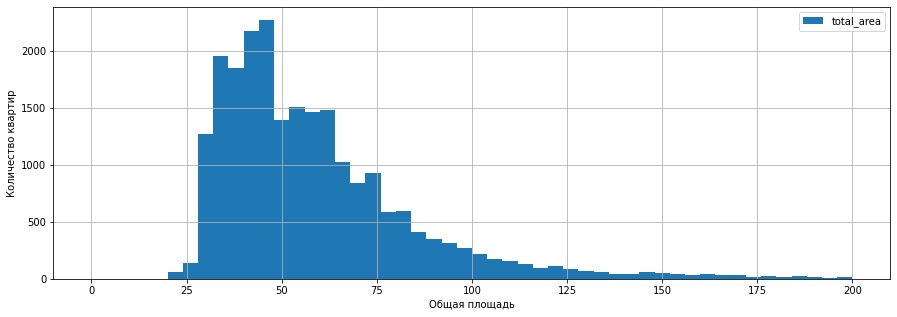

In [31]:
#начнем с общей площади 
data.plot(y = 'total_area', kind = 'hist', bins = 50, grid=True, figsize = (15,5), range = (0,200))
#добавляем подписи к осям:
#plt.title('')
plt.xlabel('Общая площадь')
plt.ylabel('Количество квартир')


Text(0, 0.5, 'Количество квартир')

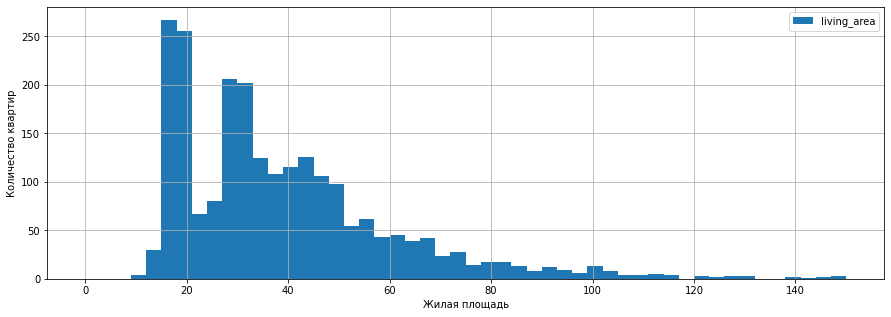

In [32]:
#жилая продащь
data.dropna().plot(y = 'living_area', kind = 'hist', bins = 50, grid=True, figsize = (15,5), range = (0,150))

#добавляем подписи к осям:
plt.xlabel('Жилая площадь')
plt.ylabel('Количество квартир')


Text(0, 0.5, 'Количество квартир')

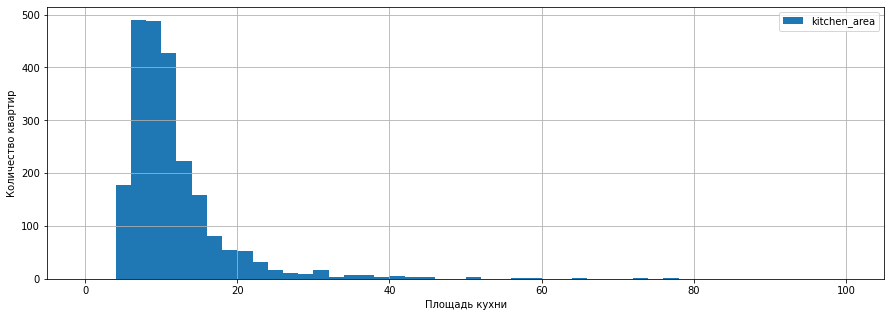

In [33]:
#площадь кухни
data.dropna().plot(y = 'kitchen_area', kind = 'hist', bins = 50, grid=True, figsize = (15,5), range = (0,100))

#добавляем подписи к осям:
plt.xlabel('Площадь кухни')
plt.ylabel('Количество квартир')


Text(0, 0.5, 'Количество квартир')

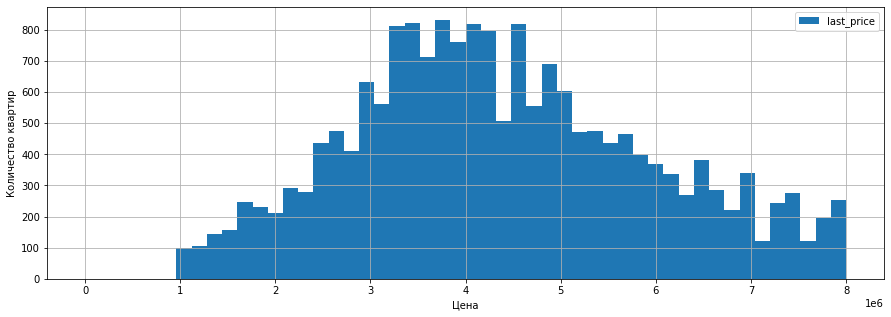

In [34]:
#цена объекта
data.plot(y = 'last_price', kind = 'hist', bins = 50, grid=True, figsize = (15,5), range = (0, 8000000))

#добавляем подписи к осям:
plt.xlabel('Цена')
plt.ylabel('Количество квартир')


Text(0, 0.5, 'Количество квартир')

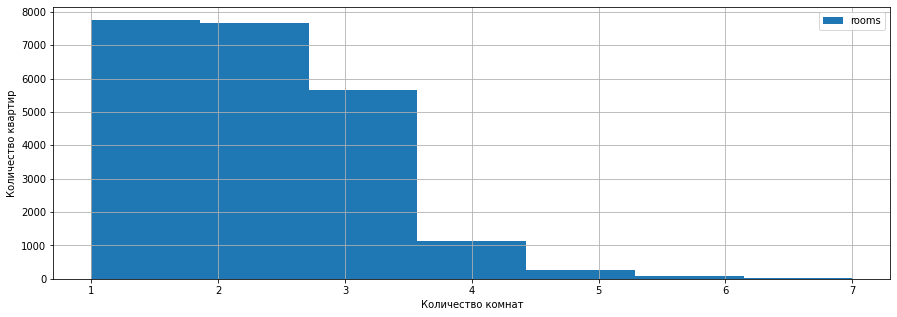

In [35]:
#количество комнат
data.plot(y = 'rooms', kind = 'hist', bins = 7, grid=True, figsize = (15,5))

#добавляем подписи к осям:
plt.xlabel('Количество комнат')
plt.ylabel('Количество квартир')

Text(0, 0.5, 'Количество квартир')

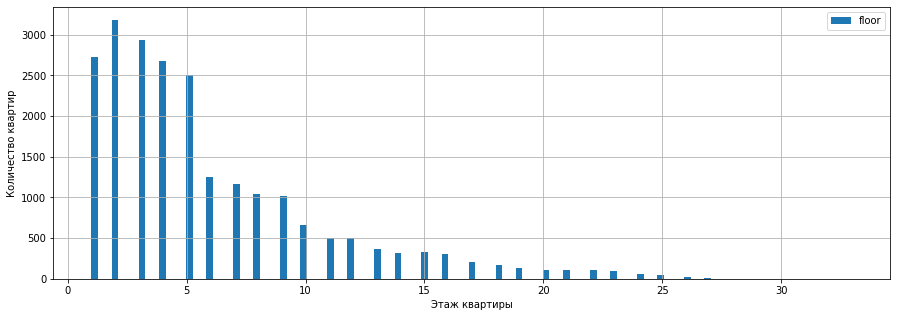

In [36]:
#этаж квартиры
data.plot(y = 'floor', kind = 'hist', bins = 113, grid=True, figsize = (15,5))

#добавляем подписи к осям:
plt.xlabel('Этаж квартиры')
plt.ylabel('Количество квартир')

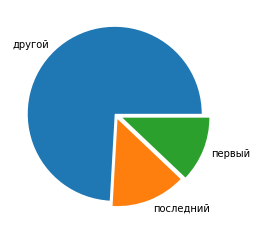

In [38]:
#тип этажа квартиры («первый», «последний», «другой»)
floors = data['floor_type'].value_counts()
labels = ['другой', 'последний', 'первый']
explode = [0.02, 0.05, 0.08]
plt.pie(floors, labels=labels, explode=explode);

<AxesSubplot:ylabel='Frequency'>

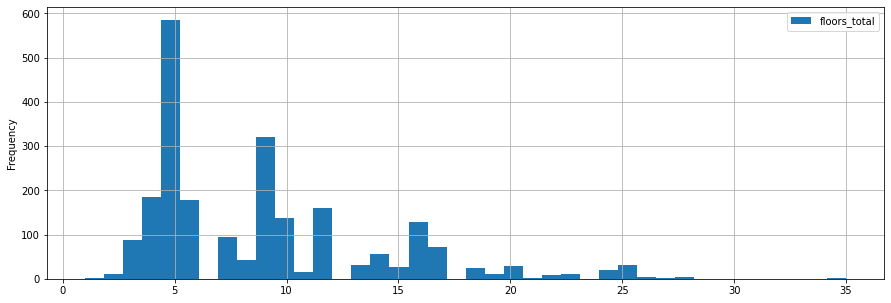

In [39]:
#общее количество этажей в доме
data.dropna().plot(y = 'floors_total', kind = 'hist', bins = 40, grid=True, figsize = (15,5))

<AxesSubplot:ylabel='Frequency'>

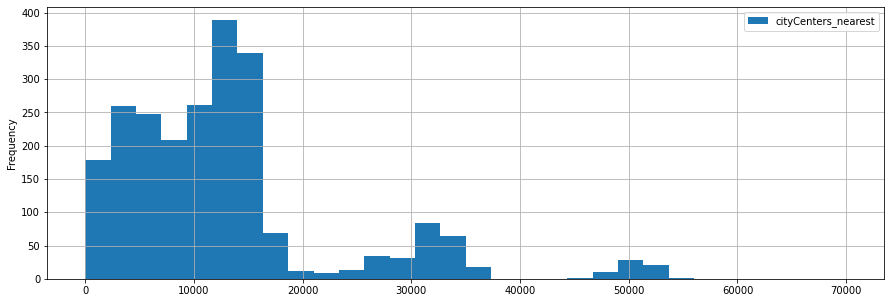

In [40]:
#расстояние до центра города в метрах
data.dropna().plot(y = 'cityCenters_nearest', kind = 'hist', bins = 30, grid=True, figsize = (15,5), range = (0,70000))

<AxesSubplot:ylabel='Frequency'>

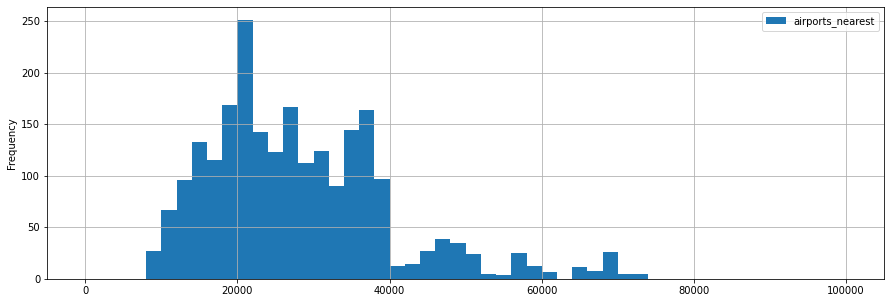

In [41]:
#расстояние до ближайшего аэропорта
data.dropna().plot(y = 'airports_nearest', kind = 'hist', bins = 50, grid=True, figsize = (15,5), range = (0, 100000))

<AxesSubplot:ylabel='Frequency'>

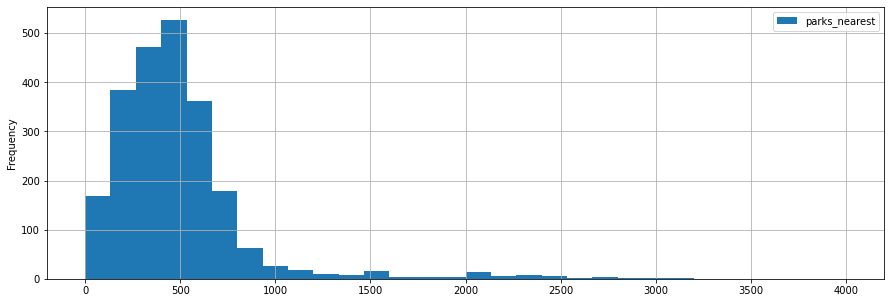

In [42]:
#расстояние до ближайшего парка
data.dropna().plot(y = 'parks_nearest', kind = 'hist', bins = 30, grid=True, figsize = (15,5), range = (0,4000))

<AxesSubplot:ylabel='Frequency'>

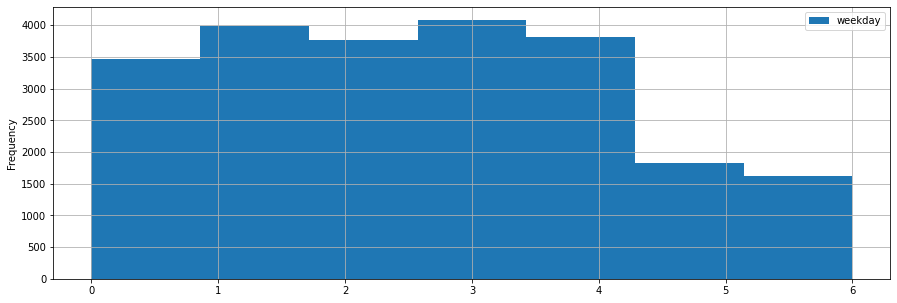

In [43]:
#день публикации объявления
data.plot(y = 'weekday', kind = 'hist', bins = 7, grid=True, figsize = (15,5), range = (0,6))

<AxesSubplot:ylabel='Frequency'>

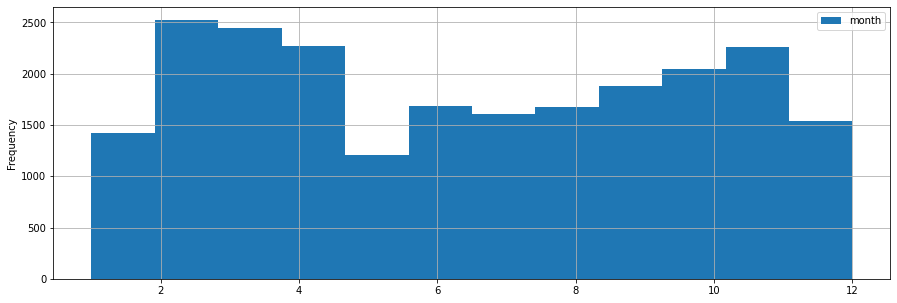

In [44]:
#месяц публикации объявления
data.plot(y = 'month', kind = 'hist', bins = 12, grid=True, figsize = (15,5), range = (1, 12))

**Вывод**

1. Гистограмма общей площади имеет распределение Пуассона, а это означает, что чаще всего квартиры имеют небольшую или среднюю площадь от 30 до 70 кв м. Но и встречаются более редкие квартиры, где площадь более 100 кв м + 
2. Тоже самое можно сказать и про жилую площадь и про кухню. Графики имеют распределение Пуассона. Жилая площадь, как правило, до 50 кв м, а кухня - до 20 кв м.
3. Цена имеет нормальное распределение. Наиболее типичные значения оказываются посередине (средняя стоимость встречает ся чаще всего).
4. Наиболее чаще встречаются одно- и двухкомнатные квартиры, немного реже трехкомнатные. 4+ уже более редко встречаются.
5. Самый популярный этаж 1-5, шестой и далее встречаются немного реже.
6. Квартир на последнем этаже больше, чем на первом (незначительно), "средние" или "другие" - встречаются чаще всего, что логично.       
7. Дома с 5 и 9 этажами встречаются наиболее часто.
8. Квартир недалеко от центра больше, чем других.
9. Меньше всего квартир рядом с аэропортом или далеко от него. Квартиры чаще всего находятся в средней удаленности от аэропорта. Здесь встречаются выбросы, их я в выводе не учитывала.
10. Практически возле каждой квартиры есть парк либо находится недалеко.
11. В будние дни квартиры публикуются чаще. Возиожно некоторые объявления публикуются риелторами в рабочее время.
12. Не сезон в сфере недвижимости - январь, декабрь и середина года.

#### Скорость продажи квартир

Далее изучим, как быстро продавались квартиры. 

Среднее значение: 167.47
Медиана: 93.0


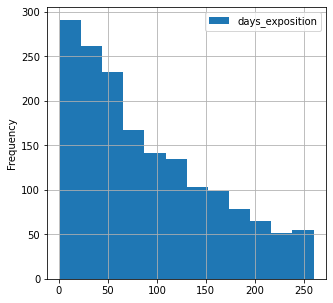

In [45]:
#посмотрим на графике как продаются квартиры
data.dropna().plot(y = 'days_exposition', kind = 'hist', bins = 12, grid=True, figsize = (5,5), range = (1, 260))

#посчитаем среднее и медиану
days_mean = data['days_exposition'].mean()
days_median = data['days_exposition'].median()
print(f'Среднее значение: {round(days_mean, 2)}')
print(f'Медиана: {round(days_median, 2)}')

На графике распределение Пуассона. БОльшая часть квартир продается в первые первые два месяца, в среднем подгода.
Среднее значение и медиана сильно отличаются (практически в 2 раза). 
Среднее значение: 167,47
Медиана: 93.0
Большое количество квартир продается в первые дни и даже за один день. Но есть и те, которые продаются почти год. 

Изучим то, как продавались квартиры по годам.

<AxesSubplot:xlabel='year'>

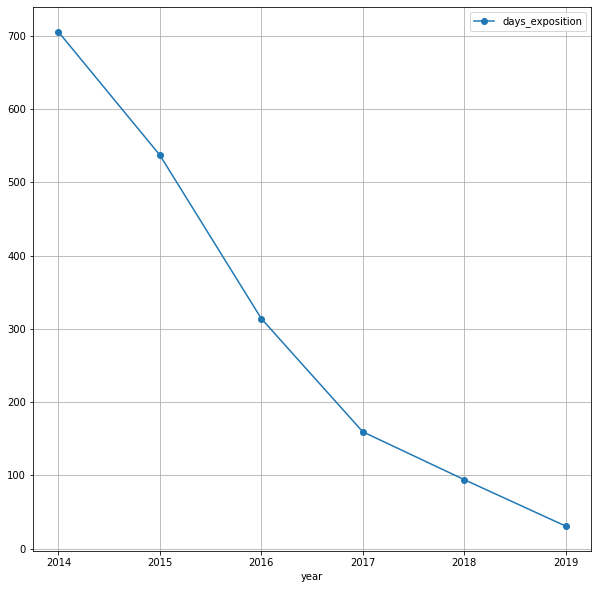

In [46]:
#построим сводную таблицу
data.pivot_table(index='year', values='days_exposition').plot(grid=True, style='-o', figsize=(10, 10))

На графике видно, что с каждым годом квартиры стали продавать все быстрее. Видим положительную тенденцию для тех, кто продает квартиру и возможно дефицит квартир.

Посмотрим что такое быстрые и долгие продажи квартир.

In [47]:
# Сроки продажи квартиры на разных квантилях

(
    data[['days_exposition']]
    .quantile([0.0012, 0.01, .5, .99, .9988]) # выбираем размах в 0,9976 квантилей 
    .style.format("{:,.2f}")
)

,days_exposition
0.0012,3.00
0.01,4.00
0.5,93.00
0.99,864.00
0.9988,978.60


Быстрая продажа квартир в течение 4 дней, а долгая более 800 дней.

**Вывод**

Большая часть квартир продается в первые первые два месяца, в среднем подгода. Среднее значение и медиана сильно отличаются (практически в 2 раза). Среднее значение: 167,47 Медиана: 93.0

Также я выяснила, что с 2014 по 2019 год наблюдается положительная тенденция и квартиры с каждым годом продаются быстрее, чем в предыдущий.

Быстрая продажа квартир в течение 4 дней, а долгая более 800 дней.

#### Параметры, которые вляют на цену

Выясним какие факторы больше всего влияют на общую (полную) стоимость объекта?

In [49]:
#для этого используем таблицу корреляции
data.corr()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,...,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_square,weekday,month,year,distance_center
total_images,1.000000,0.126991,0.123536,0.096401,0.044286,0.010729,0.108378,0.032547,0.012833,-0.016335,...,0.035279,-0.002715,0.010728,-0.008283,-0.014238,0.133993,-0.011405,0.005949,0.137013,-0.046534
last_price,0.126991,1.000000,0.663402,0.383189,0.405584,0.016038,0.553195,0.034044,0.021055,-0.011022,...,0.255629,-0.008926,0.259591,-0.112354,0.096013,0.797646,-0.007104,0.000965,-0.035488,-0.269071
total_area,0.123536,0.663402,1.000000,0.784194,0.481307,-0.058718,0.926854,-0.025746,0.019695,-0.025275,...,0.194717,-0.008438,0.207723,-0.093043,0.146690,0.265860,-0.010360,0.005451,-0.076524,-0.244941
rooms,0.096401,0.383189,0.784194,1.000000,0.261659,-0.222863,0.876916,-0.156048,-0.001763,-0.023678,...,0.135252,-0.044832,0.110636,-0.048952,0.111344,0.011407,-0.003566,-0.002919,-0.044493,-0.174537
ceiling_height,0.044286,0.405584,0.481307,0.261659,1.000000,-0.086018,0.429280,-0.044759,0.057828,0.001451,...,0.283423,-0.047491,0.266798,-0.147972,0.118485,0.348002,-0.019083,-0.000640,-0.096397,-0.361901
floors_total,0.010729,0.016038,-0.058718,-0.222863,-0.086018,1.000000,-0.173321,0.677534,-0.025592,0.016850,...,-0.159376,0.095654,-0.052172,0.044264,-0.055383,0.160129,0.014947,0.016915,0.007894,0.011346
living_area,0.108378,0.553195,0.926854,0.876916,0.429280,-0.173321,1.000000,-0.110674,0.010979,-0.018718,...,0.198165,-0.043373,0.177669,-0.067107,0.137716,0.159658,-0.007224,-0.006439,-0.065455,-0.234269
floor,0.032547,0.034044,-0.025746,-0.156048,-0.044759,0.677534,-0.110674,1.000000,-0.014620,0.011597,...,-0.105939,0.073944,-0.031578,0.031087,-0.041750,0.132806,0.011890,0.021562,0.006306,0.006084
is_apartment,0.012833,0.021055,0.019695,-0.001763,0.057828,-0.025592,0.010979,-0.014620,1.000000,-0.000988,...,0.014558,-0.024935,0.019795,0.005804,-0.003065,0.024787,-0.008593,-0.003985,0.019759,0.010719
studio,-0.016335,-0.011022,-0.025275,-0.023678,0.001451,0.016850,-0.018718,0.011597,-0.000988,1.000000,...,-0.008515,-0.005448,-0.005617,-0.001849,-0.011785,0.000930,-0.003622,-0.008291,-0.032600,-0.000930


С помощью таблицы корреляции уже можно увидеть зависимость между ценой и некоторыми параметрами:
- общей площаью
- жилой площадью
- площадью кухни


Но изучим это подробнее на графиках.

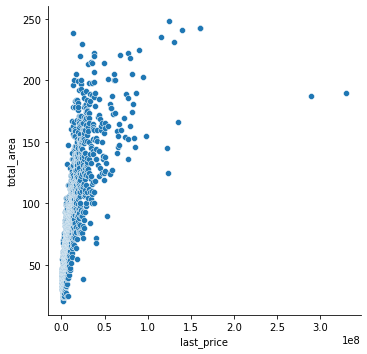

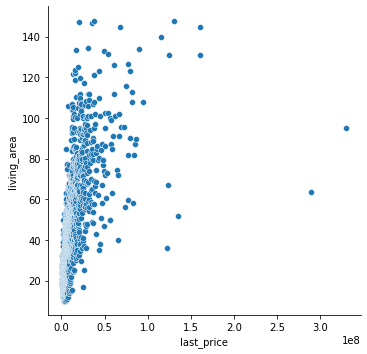

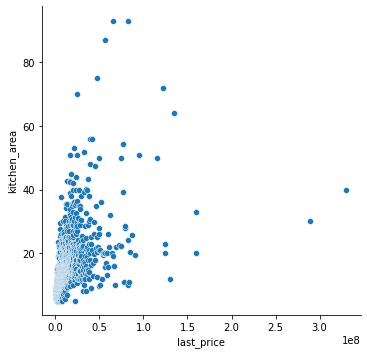

In [50]:
price_pivot_area = data.pivot_table(index='last_price', values=([
    'total_area', 'living_area', 'kitchen_area']), aggfunc='median')
price_pivot_area = price_pivot_area.reset_index()

# Посмотрим на диаграммы рассеяния для столбцов 'total_area', 'living_area', 'kitchen_area'.
for row in ['total_area', 'living_area', 'kitchen_area']:
    sns.relplot(data=price_pivot_area, x='last_price', y=row, kind='scatter')

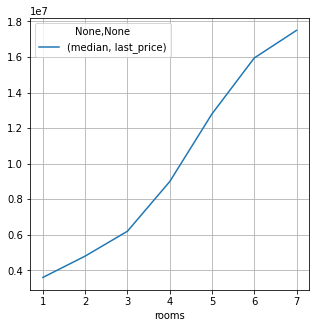

In [51]:
rooms_pivot = data.pivot_table(index='rooms', 
                               values='last_price', 
                               aggfunc = ['median']).plot(grid=True, style='-', figsize=(5, 5))


<AxesSubplot:xlabel='floor_type'>

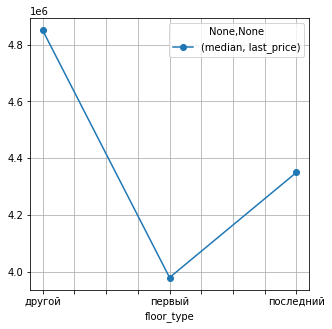

In [52]:
data.pivot_table(index='floor_type', 
                 values='last_price', 
                 aggfunc = ['median']).plot(grid=True, style='-o', figsize=(5, 5))

<AxesSubplot:xlabel='year'>

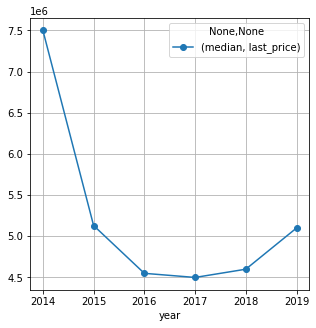

In [53]:
data.pivot_table(index='year', 
                 values='last_price', 
                 aggfunc = ['median']).plot(grid=True, style='-o', figsize=(5, 5))

Остановимся на это моменте и изучим подробнее, какие еще параметры изменялись по годам и что могло повлиять на скорость продажи и цену. Для этого построим сводные таблицы и графики для общей площади и количеству объявлений в год.

<AxesSubplot:xlabel='year'>

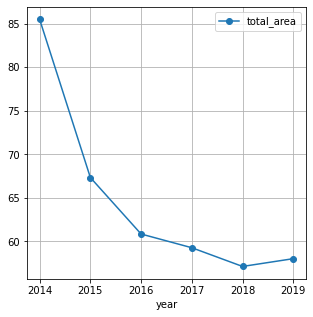

In [54]:
data.pivot_table(index='year', 
                 values='total_area').plot(grid=True, style='-o', figsize=(5, 5))

<AxesSubplot:xlabel='year'>

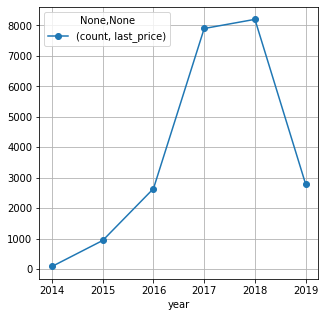

In [55]:
data.pivot_table(index='year', 
                 values='last_price', 
                 aggfunc = ['count']).plot(grid=True, style='-o', figsize=(5, 5))

<AxesSubplot:xlabel='year'>

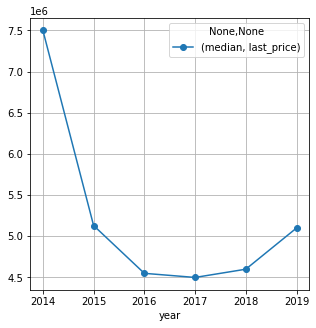

In [56]:
data.pivot_table(index='year', 
                 values='last_price', 
                 aggfunc = ['median']).plot(grid=True, style='-o', figsize=(5, 5))

<AxesSubplot:xlabel='weekday'>

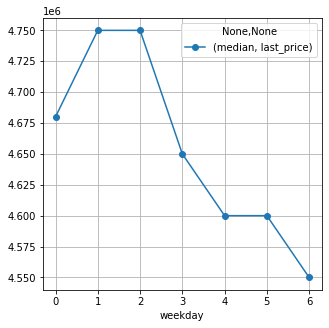

In [57]:
data.pivot_table(index='weekday', 
                 values='last_price', 
                 aggfunc = ['median']).plot(grid=True, style='-o', figsize=(5, 5))

**Вывод**

Глядя на таблицу корреляции и графики, можно сказать, что цена квартиры, в первую очередь, зависит от общей площади, жилой площади и размера кухни. Это логично, больше квадратных метров - больше цена. 
Также очень заметна зависимость цены квартиры от количества комнат. Все как в жизни, только теперь видим это на графике. 

Дешевле всего можно купить кватиру на первом этаже, средняя цена у квартир на последнем этаже, а средние этажи самые дорогие.

В 2014 году квартиры были намного дороже, после чего началось снижение цен. Начиная с 2018 квартиры снова стали расти в цене. Также я выяснила, что с 2014 по 2019 год наблюдается положительная тенденция и квартиры с каждым годом продаются быстрее, чем в предыдущий.

Чтобы понять, почему так произошло было изучено количество объявлений за каждый год и зависимость года и среднее значение площадей квартиры. 
Было выяснено, что с каждым годом среднее значение площадей квартиры (кроме 2019 года), а количество объявлений увеличивалось каждый год (кроме 2019). Скорее всего это и повлияло квартир, количество объявлений росло с квратирами у которых общая площадь наоборот уменьшалась.

Быстрой продажей квартир можно считать 4 дня, а долгой - более 800 дней.

Зависимости цены квартиры от месяца я не нашла. Одно из наблюдений: в июне квартиры самые дешевые. В остальные месяцы почти одинаковая цена.

В начале недели добавляют самые дорогие квартиры. 




Далее посчитаем среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений. Выделим населённые пункты с самой высокой и низкой стоимостью квадратного метра.

#### Населённые пункты с самой высокой и низкой стоимостью квадратного метра

In [58]:
# создадим список из топ-10 населенных пунктов
top_10 = data['locality_name'].value_counts().head(10)
top_10

санкт-петербург    15089
мурино               549
кудрово              443
шушары               429
всеволожск           386
пушкин               357
колпино              335
парголово            322
гатчина              301
выборг               231
Name: locality_name, dtype: int64

Text(0.5, 1.0, 'Стоимость квадратного метра среди топ-10 населенных пунктов')

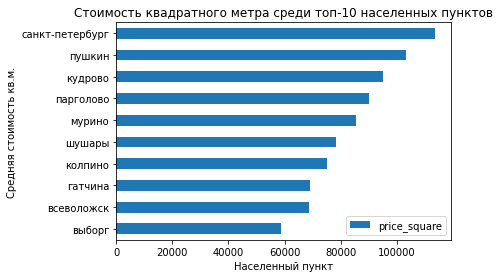

In [59]:
# создадим список из топ-10 населенных пунктов
top_10 =  data['locality_name'].value_counts().head(10)

#создадим сводную таблицу
locality_pivot = round(data.query('locality_name in (@top_10.index)').pivot_table(index='locality_name', values='price_square'), 2)
locality_pivot.sort_values('price_square', ascending=True).plot(kind='barh')
plt.ylabel('Средняя стоимость кв.м.')
plt.xlabel('Населенный пункт')
plt.title('Стоимость квадратного метра среди топ-10 населенных пунктов')


**Вывод**
На графике топ-10 носеленных пунктов с самым дорогим и дешевым квадратным метром. Самое дорогое жилье в Санкт-Петербурге. Далее идет поселок Пушкин с хорошей застройкой. В целом в топ попали поселки, наиболее близкие к СПб и имеющие наиболее развитую инфраструктуру, что подтверждается адекватность данных. Наиболее недорогой кв.м. в Выборге.

#### Зависимость стоимости кв.м. от расстояния до центра

Теперь узнаем как стоимость объектов зависит от расстояния до центра Санкт-Петербурга и вычислим среднюю цену каждого километра. 

<AxesSubplot:xlabel='distance_center'>

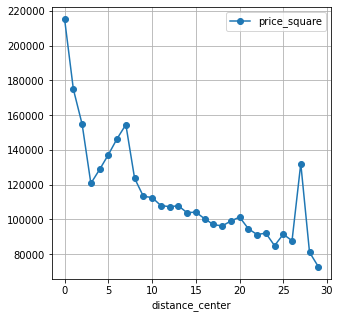

In [60]:
#создадим сводную таблицу
spb_list = data[data['locality_name'] == 'санкт-петербург']
spb_list.pivot_table(index='distance_center', values='price_square').plot(grid=True, style='-o', figsize=(5, 5))


На графике заметно, что наибольная стоимость квадратного метра в центре города. А чем дальше от центра, тем дешевле. Однако есть еще два пика, которые выделяются на графике. Вероятно, это какие-то элитные районы города(7 км от центра) и поселки(27 км от центра). 

Посмотрим как меняется общая стоимость квартиры в зависимости от расстояния до центра.

<AxesSubplot:xlabel='distance_center'>

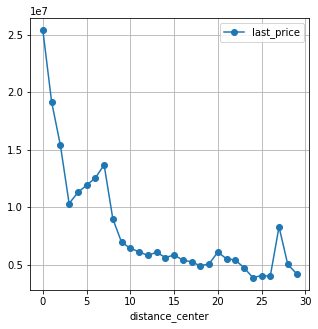

In [61]:
#создадим сводную таблицу
spb_list = data[data['locality_name'] == 'санкт-петербург']
spb_list.pivot_table(index='distance_center', values='last_price').plot(grid=True, style='-o', figsize=(5, 5))


Здесь мы наблюдаем тоже самое: наибольная средняя стоимость квартир в центре города. А чем дальше от центра, тем дешевле. И также есть выброс на 27 км.

Изучим подробнее откуда такая высокая стоимость на 27 км от центра.

In [62]:
data.loc[(data['distance_center'] == 27) & (data['locality_name'] == 'санкт-петербург')]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_square,weekday,month,year,floor_type,distance_center
748,13,14350000,74.0,2017-11-28,2,3.13,5,30.0,3,False,...,1496.0,0,NaN,128.0,193918,1,11,2017,другой,27.0
5961,6,2250000,32.0,2018-02-27,1,NaN,2,16.5,2,False,...,NaN,0,NaN,178.0,70312,1,2,2018,последний,27.0


Мы видим, что очень мало квартир в СПб на 27 км по сравнению с остальными группами по километрам. Из-за этого оно выбивается. Маленькая выборка создала аномально высокую цену.

Также изучим почему на 4 км квартиры дешевле, чем на 3 и 5 км. Узнаем откуда провал.

<AxesSubplot:xlabel='distance_center'>

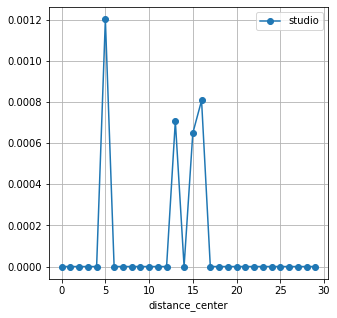

In [63]:
spb_list.pivot_table(index='distance_center', values='studio').plot(grid=True, style='-o', figsize=(5, 5))

In [64]:
# способы группировки и сортировки информации

(
    data[data['locality_name'] == 'санкт-петербург']
     .query('3 <= distance_center <=5 ')
     .groupby(['distance_center', 'floor_type'])['last_price']
     .agg(['count', 'mean'])
     .style.format("{:,.0f}")
)

# Общий вывод
Проводилось исследование, цель которого - изучить особенности и зависимости, которые существуют на рынке недвижимости, а именно:
1. Изучить различные параметры объектов (общая площадь, жилая площадь, площадь кухни, цена объекта и т.д.) и выявить закономерности
2. Изучить, как быстро продавались квартиры, узнать сколько времени обычно занимает продажа. 
3. Какие факторы больше всего влияют на общую (полную) стоимость объекта?
4. Посчитать среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений и выделить населённые пункты с самой высокой и низкой стоимостью квадратного метра. 
5. Выяснить, как стоимость объектов зависит от расстояния до центра города.

В результате исследования были выявлены зависимости.

1. Для ответа на первый вопрос были построены гистограммы, которые позволяют сделать определенные выводы:
- Чаще всего квартиры имеют небольшую или среднюю площадь от 30 до 70 кв м. Но и встречаются более редкие квартиры, где площадь более 100 кв м +, с также квартиры с очень маленькой площадью до 15 кв м
- Тоже самое можно сказать и про жилую площадь и про кухню. Жилая площадь, как правило, до 50 кв м, а кухня - до 20 кв м.
- Средняя стоимость квартир встречается чаще всего.
- Наиболее чаще встречаются одно- и двухкомнатные квартиры, немного реже трехкомнатные. 4+ уже более редко встречаются.
- Самый популярный этаж 1-5, шестой и далее встречаются немного реже.
- Квартир на последнем этаже больше, чем на первом (незначительно), "средние" или "другие" - встречаются чаще всего, что логично.       
- Дома с 5 и 9 этажами встречаются наиболее часто.
- Квартир недалеко от центра больше, чем других.
- Меньше всего квартир рядом с аэропортом или далеко от него. Квартиры чаще всего находятся в средней удаленности от аэропорта. 
- Практически возле каждой квартиры есть парк либо находится недалеко.
- В будние дни квартиры публикуются чаще.
- Не сезон в сфере недвижимости - январь, декабрь и середина года.

2. Большая часть квартир продается в первые первые два месяца, в среднем подгода. Среднее значение и медиана сильно отличаются (практически в 2 раза). Среднее значение: 167,47 Медиана: 93.0

Также я выяснила, что с 2014 по 2019 год наблюдается положительная тенденция и квартиры с каждым годом продаются быстрее, чем в предыдущий.

Быстрая продажа квартир в течение 4 дней, а долгая более 800 дней.

3. Для ответа на третий вопрос была построена таблица корреляции и графики. 
- По ним можно заметить, что цена квартиры, в первую очередь, зависит от общей площади, жилой площади и размера кухни (показатель корреляции стремится к 1). Больше квадратных метров - больше цена. 
- Также очень заметна зависимость цены квартиры от количества комнат. 
- Дешевле всего можно купить кватиру на первом этаже, средняя цена у квартир на последнем этаже, а средние этажи самые дорогие.
- В 2014 году квартиры были намного дороже, после чего началось снижение цен. Начиная с 2018 квартиры снова стали расти в цене. Также я выяснила, что с 2014 по 2019 год наблюдается положительная тенденция и квартиры с каждым годом продаются быстрее, чем в предыдущий. Чтобы понять, почему так произошло было изучено количество объявлений за каждый год и зависимость года и среднее значение площадей квартиры. Было выяснено, что с каждым годом среднее значение площадей квартиры (кроме 2019 года), а количество объявлений увеличивалось каждый год (кроме 2019). Скорее всего это и повлияло квартир, количество объявлений росло с квратирами у которых общая площадь наоборот уменьшалась.
- Зависимости цены квартиры от месяца я не нашла. Одно из наблюдений: в июне квартиры самые дешевые. В остальные месяцы почти одинаковая цена.
- В начале недели добавляют самые дорогие квартиры. 

4. Самое дорогое жилье в Санкт-Петербурге. Далее идет поселок Пушкин с хорошей застройкой. В целом в топ попали поселки, наиболее близкие к СПб и имеющие наиболее развитую инфраструктуру, что подтверждается адекватность данных. Наиболее недорогой кв.м. в Выборге.

5. При изучении последнего вопроса было выявлено, что наибольная стоимость квадратного метра в центре города. А чем дальше от центра, тем дешевле. Однако есть еще пик, который выделяется на графике на 27 км. Изучив подробнее данные я выяснила, что очень мало квартир в СПб на 27 км по сравнению с остальными группами по километрам. Из-за этого оно выбивается. Маленькая выборка создала аномально высокую цену.
